In [171]:
#IMPORTING MODULES
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

#SKLEARN
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



sns.set_palette('tab10')

PATH = Path().parent

In [172]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.5, random_state=42069)

In [173]:
X = pd.DataFrame(X, columns=['x','y'])

<AxesSubplot:xlabel='x', ylabel='y'>

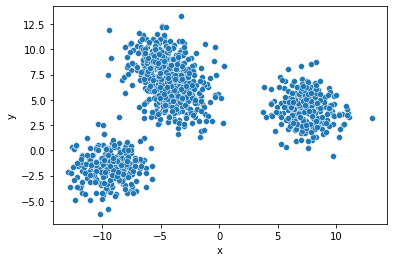

In [174]:
sns.scatterplot(data=X, x='x',y='y')

c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

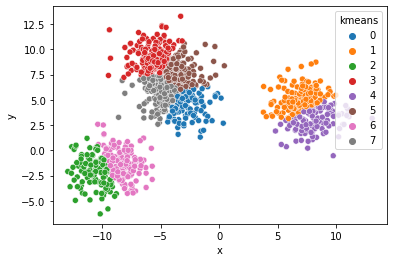

In [175]:
kmeans  = KMeans(8)
kmeans.fit(X[['x','y']])

X['kmeans']=kmeans.labels_
sns.scatterplot(data=X, x='x',y='y',hue='kmeans', palette='tab10')

c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

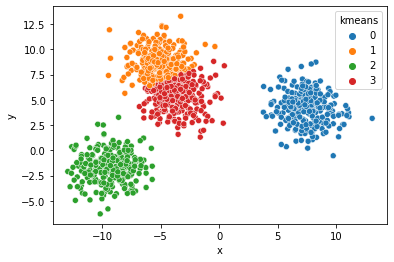

In [176]:
kmeans  = KMeans(4)
kmeans.fit(X[['x','y']])

X['kmeans']=kmeans.labels_
sns.scatterplot(data=X, x='x',y='y',hue='kmeans', palette='tab10')

c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


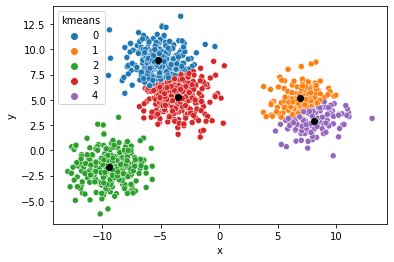

In [177]:
kmeans  = KMeans(5, max_iter=300)
kmeans.fit(X[['x','y']])

X['kmeans']=kmeans.labels_
sns.scatterplot(data=X, x='x',y='y',hue='kmeans', palette='tab10')
plt.scatter(x=kmeans.cluster_centers_[:,0],y= kmeans.cluster_centers_[:,1], color='black')

<AxesSubplot:xlabel='x', ylabel='y'>

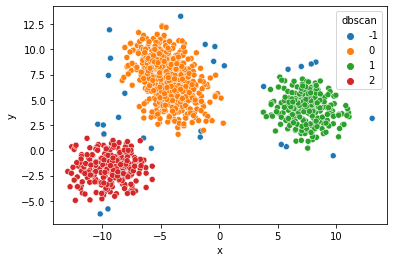

In [178]:
dbscan = DBSCAN(eps=1).fit(X[['x','y']])
X['dbscan'] = dbscan.labels_

sns.scatterplot(data=X, x='x',y='y',hue='dbscan',palette='tab10')

In [179]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [180]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<AxesSubplot:xlabel='comp 1', ylabel='comp 2'>

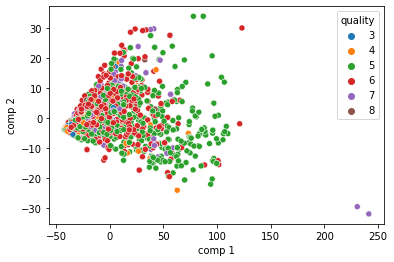

In [183]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

df_pca = pd.DataFrame(X_pca, columns=['comp 1', 'comp 2'])
df_pca['quality'] = y

sns.scatterplot(data=df_pca,x='comp 1',y='comp 2', hue='quality',palette='tab10')

<AxesSubplot:xlabel='comp 1', ylabel='comp 2'>

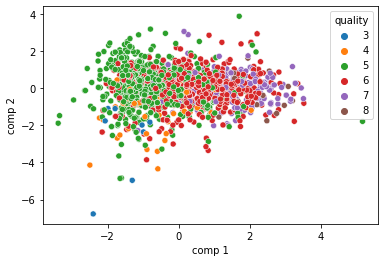

In [184]:
lda = LinearDiscriminantAnalysis(n_components=2).fit(X,y)
X_lda = lda.transform(X)
df_lda = pd.DataFrame(X_lda, columns=['comp 1','comp 2'])
df_lda['quality'] = y

sns.scatterplot(data=df_lda, x='comp 1', y='comp 2', hue='quality', palette='tab10')